## This is a program to analyze the experimental test data of outgassing rate
### How to obtain raw data: 
* Obtain raw data from RGA software, import the data into .xlsx for analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import matplotlib.ticker as mtick

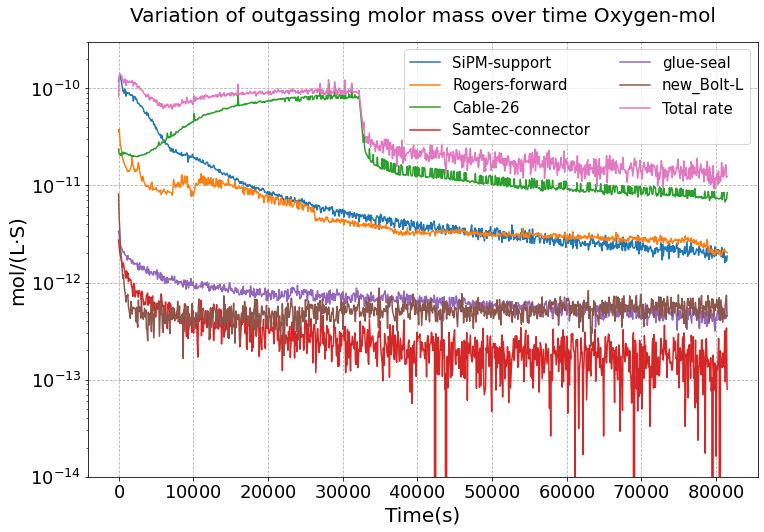

In [2]:
plt.style.use('./my.mplstyle')

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
#materials = ['SiPM-support','new_SiPM-support']
materials = ['background','SiPM-support','Rogers-forward','Cable-26','Samtec-connector','glue-seal','new_Bolt-L']
element = 'Oxygen-mol'
for material in materials: 
    df = pd.read_excel('./data/outgassing.xlsx',engine='openpyxl',sheet_name=material,header=1,usecols=[element,'Time'])
    data=df.head()
    #for i in np.arange(len(df['Time']))
    
    if material =='background':
        S=df['Oxygen-mol']-df['Oxygen-mol']
        B=df['Oxygen-mol']
        continue
    S = -6*B+S+df['Oxygen-mol']
     
    plt.plot(df['Time'],df[element],label=material)#,color='red')
    #plt.plot(df['Time'],df[element]*133.22*0.06/8.31/293.15*2/6.028,label=material)#,color='red')
plt.plot(df['Time'],S,label='Total rate')#,color='red')
plt.legend(loc='upper right',ncol=2,prop={'size': 15})
plt.xlabel('Time(s)',size =20)
plt.ylabel('mol/(L·S)',size =20)
plt.title('Variation of outgassing molor mass over time '+element,size = 20,pad=20)
plt.tick_params(labelsize=18,grid_linestyle='--')
plt.grid(True)
plt.ylim(1e-14,3e-10)

plt.yscale('log')
plt.savefig('./plots/Outgassing-result.pdf')